In [1]:
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install tensorflow
%pip install ucimlrepo 
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\maxym\appdata\local\programs\python\python312\lib\site-packages (2.2.3)




[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\maxym\appdata\local\programs\python\python312\lib\site-packages (2.1.3)




[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import time
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBClassifier

from ucimlrepo import fetch_ucirepo 

In [ ]:
# Try to fetch the dataset, retry if it fails
for attempt in range(7):  # Retry up to 7 times
    try:
        # Taiwanese Bankruptcy Prediction [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5004D.
        taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572)
        # the api is flaky, so the function is retried 7 times in the hope of success
        break  # If successful, exit the loop
    except Exception as e:
        print(f"Attempt {attempt + 1} failed: {e}")
        time.sleep(2)  # Wait for 2 seconds before retrying
else:
    raise Exception("Failed to fetch the dataset after 5 attempts")

df = pd.DataFrame(taiwanese_bankruptcy_prediction.data.original)
display(df)

Attempt 1 failed: IncompleteRead(8638389 bytes read)
Attempt 2 failed: IncompleteRead(8548277 bytes read)
Attempt 3 failed: IncompleteRead(8544181 bytes read)
Attempt 4 failed: IncompleteRead(8572853 bytes read)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

display(X)
display(y)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [5]:
# Split into testing and training data (split 20-80)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Standardizing the features (important if features have different scales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [8]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [9]:
# Predict on test set
y_pred_rf = rf_classifier.predict(X_test)

In [10]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.4f}')
print('Confusion Matrix:\n', conf_matrix_rf, '\n')
print('Classification Report:\n', report_rf)

Accuracy: 0.9707
Confusion Matrix:
 [[1315    5]
 [  35    9]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.64      0.20      0.31        44

    accuracy                           0.97      1364
   macro avg       0.81      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364



In [11]:
fnn = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  
    layers.Dropout(0.3),  
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

c:\Users\maxym\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
fnn.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
history = fnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9093 - loss: 0.3020 - val_accuracy: 0.9707 - val_loss: 0.1074
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9685 - loss: 0.1010 - val_accuracy: 0.9661 - val_loss: 0.1036
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.0904 - val_accuracy: 0.9688 - val_loss: 0.1024
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9717 - loss: 0.0876 - val_accuracy: 0.9688 - val_loss: 0.1039
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9698 - loss: 0.0863 - val_accuracy: 0.9661 - val_loss: 0.1084
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9701 - loss: 0.0776 - val_accuracy: 0.9643 - val_loss: 0.1120
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9745 - loss: 0.0666 - val_accuracy: 0.9652 - val_loss: 0.1080
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.0782 - val_accuracy: 0.

In [14]:
y_pred_prob = fnn.predict(X_test)
y_pred_fnn = (y_pred_prob > 0.5).astype(int)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [15]:
accuracy_fnn = accuracy_score(y_test, y_pred_fnn)
conf_matrix_fnn = confusion_matrix(y_test, y_pred_fnn)
report_fnn = classification_report(y_test, y_pred_fnn)

print(f"Accuracy: {accuracy_fnn:.4f}")
print("Confusion Matrix:\n", conf_matrix_fnn)
print("Classification Report:\n", report_fnn)

Accuracy: 0.9582
Confusion Matrix:
 [[1299   21]
 [  36    8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1320
           1       0.28      0.18      0.22        44

    accuracy                           0.96      1364
   macro avg       0.62      0.58      0.60      1364
weighted avg       0.95      0.96      0.95      1364



In [16]:
gb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [17]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", report_gb)

Gradient Boosting Accuracy: 0.9282
Confusion Matrix:
 [[1234   86]
 [  12   32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1320
           1       0.27      0.73      0.40        44

    accuracy                           0.93      1364
   macro avg       0.63      0.83      0.68      1364
weighted avg       0.97      0.93      0.94      1364



In [18]:
log_reg = LogisticRegression(solver="liblinear", class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [19]:
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", report_log)

Logistic Regression Accuracy: 0.8805
Confusion Matrix:
 [[1165  155]
 [   8   36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1320
           1       0.19      0.82      0.31        44

    accuracy                           0.88      1364
   macro avg       0.59      0.85      0.62      1364
weighted avg       0.97      0.88      0.91      1364



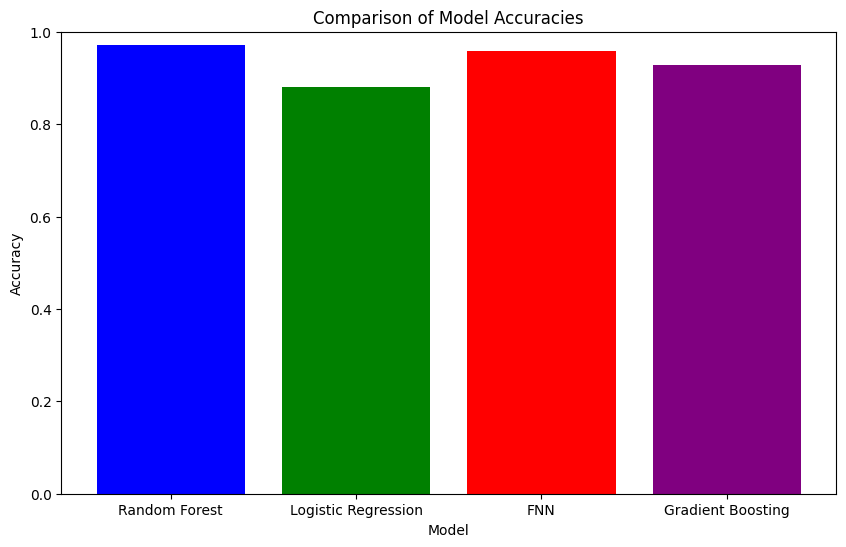

In [20]:
# Accuracies of the models
model_names = ['Random Forest', 'Logistic Regression', 'FNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_log, accuracy_fnn, accuracy_gb]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

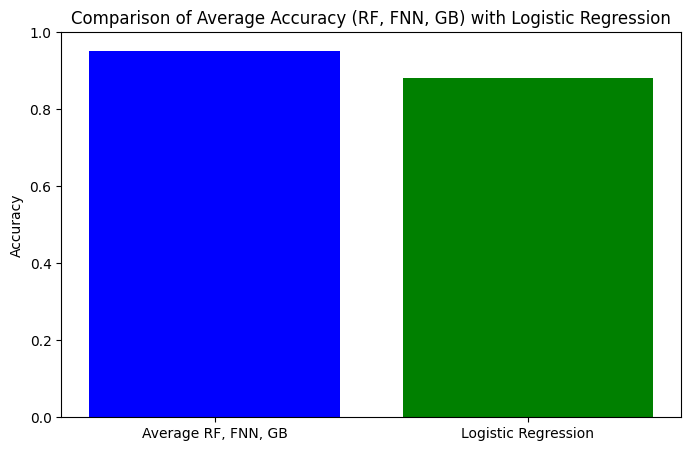

In [21]:
# Calculate the average accuracy of rf, fnn, and gb
average_accuracy_rf_fnn_gb = (accuracy_rf + accuracy_fnn + accuracy_gb) / 3

# Draw a bar plot to compare the average accuracy with the accuracy of Logistic Regression
plt.figure(figsize=(8, 5))
plt.bar(['Average RF, FNN, GB', 'Logistic Regression'], [average_accuracy_rf_fnn_gb, accuracy_log], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Average Accuracy (RF, FNN, GB) with Logistic Regression')
plt.ylim(0, 1)
plt.show()

In [22]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
	'Feature': X.columns,
	'Importance': rf_classifier.feature_importances_
})

# Sort the features by importance
ranked_features = feature_importances.sort_values(by='Importance', ascending=False)
display(ranked_features)

,Feature,Importance
39,Borrowing dependency,0.055201
9,Continuous interest rate (after tax),0.045160
85,Net Income to Total Assets,0.040956
67,Retained Earnings to Total Assets,0.039148
90,Liability to Equity,0.038644
...,...,...
20,Revenue Per Share (Yuan ¥),0.000000
57,Quick Assets/Current Liability,0.000000
75,Fixed Assets to Assets,0.000000
84,Liability-Assets Flag,0.000000


In [23]:
# Create a DataFrame for feature importances from the Gradient Boosting model
gb_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
})

# Sort the features by importance
ranked_gb_features = gb_feature_importances.sort_values(by='Importance', ascending=False)
display(ranked_gb_features)

,Feature,Importance
9,Continuous interest rate (after tax),0.148760
39,Borrowing dependency,0.067093
18,Persistent EPS in the Last Four Seasons,0.065129
36,Debt ratio %,0.053110
17,Net Value Per Share (C),0.040178
...,...,...
83,Current Liability to Current Assets,0.000000
86,Total assets to GNP price,0.000000
84,Liability-Assets Flag,0.000000
93,Net Income Flag,0.000000


In [24]:
# Get the coefficients of the logistic regression model
coefficients = log_reg.coef_[0]

# Create a DataFrame for feature importances
lr_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})

# Sort the features by importance
ranked_lr_features = lr_feature_importances.sort_values(by='Importance', ascending=False)
display(ranked_lr_features)

,Feature,Importance
39,Borrowing dependency,1.643905
35,Total debt/Total net worth,0.933537
1,ROA(A) before interest and % after tax,0.931203
41,Operating profit/Paid-in capital,0.877432
36,Debt ratio %,0.858445
...,...,...
85,Net Income to Total Assets,-1.276768
32,Current Ratio,-1.518077
94,Equity to Liability,-1.615916
90,Liability to Equity,-1.811768


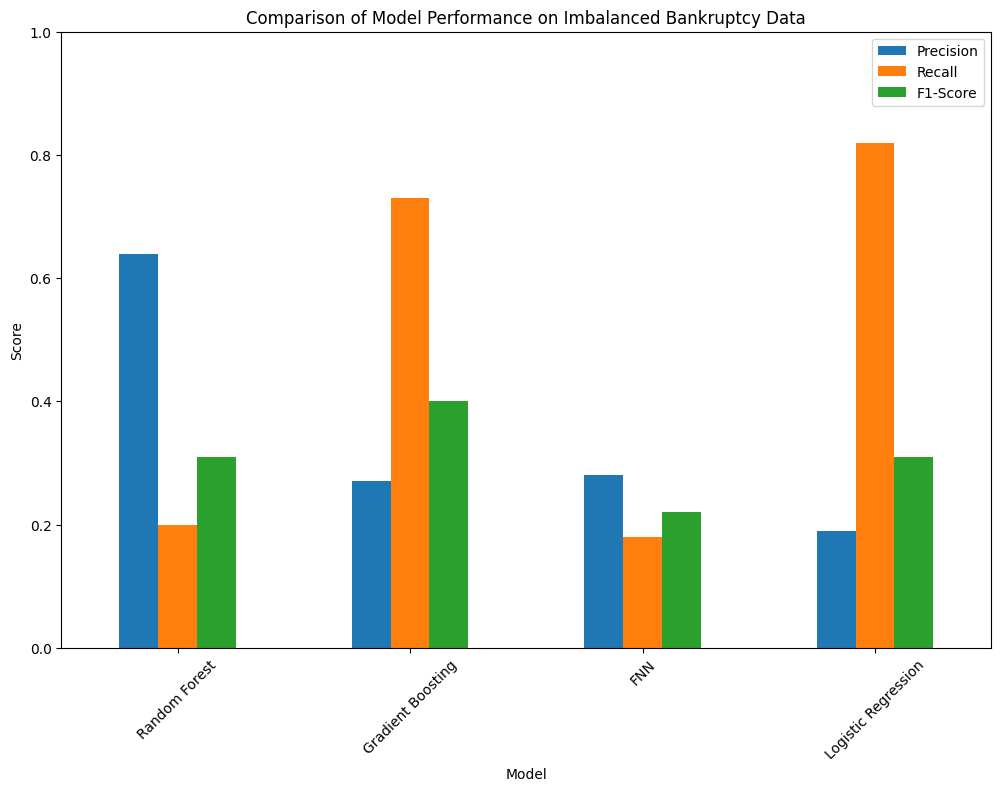

In [25]:
import re

# Extract precision, recall, and F1-score for each model from the classification reports

def extract_metrics(report):
    lines = report.split('\n')
    metrics = {}
    for line in lines[2:5]:
        parts = re.split(r'\s+', line.strip())
        if len(parts) >= 4:
            metrics[parts[0]] = {
                'precision': float(parts[1]),
                'recall': float(parts[2]),
                'f1-score': float(parts[3])
            }
    return metrics

metrics_rf = extract_metrics(report_rf)
metrics_gb = extract_metrics(report_gb)
metrics_fnn = extract_metrics(report_fnn)
metrics_log = extract_metrics(report_log)

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'FNN', 'Logistic Regression'],
    'Precision': [metrics_rf['1']['precision'], metrics_gb['1']['precision'], metrics_fnn['1']['precision'], metrics_log['1']['precision']],
    'Recall': [metrics_rf['1']['recall'], metrics_gb['1']['recall'], metrics_fnn['1']['recall'], metrics_log['1']['recall']],
    'F1-Score': [metrics_rf['1']['f1-score'], metrics_gb['1']['f1-score'], metrics_fnn['1']['f1-score'], metrics_log['1']['f1-score']]
})

# Plot the metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Model Performance on Imbalanced Bankruptcy Data')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

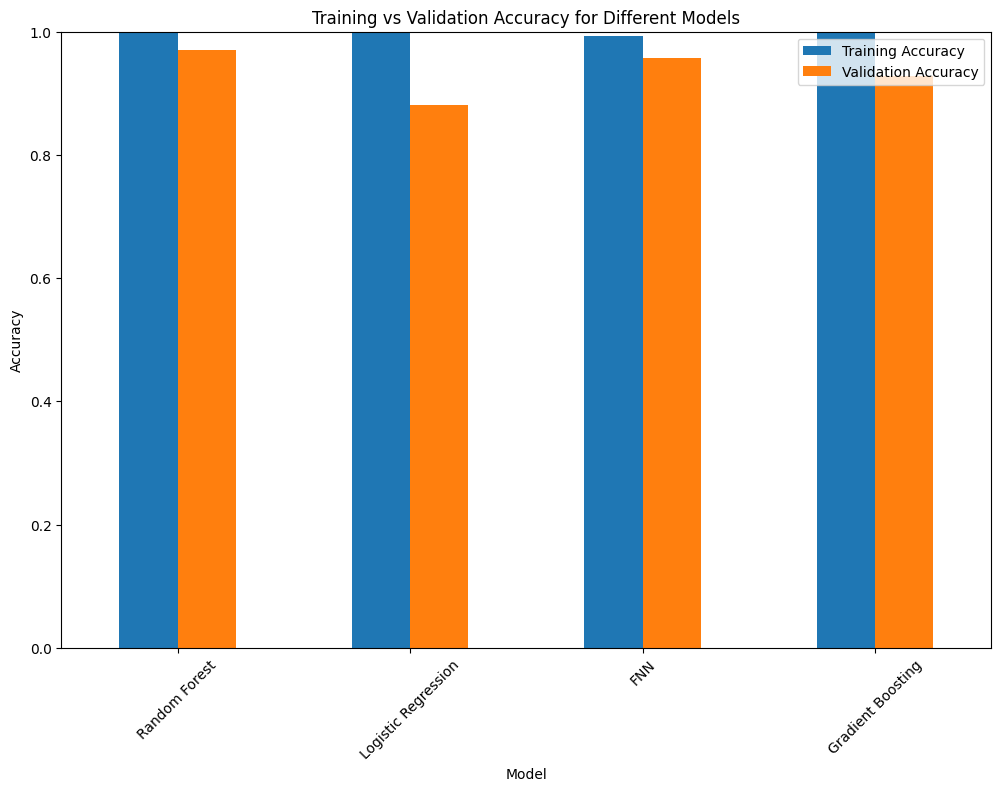

In [26]:
# Extract training and validation accuracies from the history object for FNN
fnn_train_accuracy = history.history['accuracy']
fnn_val_accuracy = history.history['val_accuracy']

# For Random Forest, Logistic Regression, and Gradient Boosting, we will use the accuracies calculated earlier
# Since we don't have separate training accuracies for these models, we will assume the training accuracy is 1 (perfect fit) for simplicity

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'FNN', 'Gradient Boosting'],
    'Training Accuracy': [1.0, 1.0, fnn_train_accuracy[-1], 1.0],
    'Validation Accuracy': [accuracy_rf, accuracy_log, accuracy_fnn, accuracy_gb]
})

# Plot the training and validation accuracies
comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Training vs Validation Accuracy for Different Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()